In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_bboxes(image):
        # GaussianBlur to reduce image noise
        blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

        # Apply Canny edge detection
        edges = cv2.Canny(blurred_image, 100, 200)

        # Find coordinates of edge points
        y, x = np.where(edges > 0)
        edge_points = np.column_stack((x, y))

        # Apply DBSCAN clustering based on distance
        db = DBSCAN(eps=10, min_samples=5).fit(edge_points)
        labels = db.labels_

        # Get the number of clusters
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # Create an image to display the clusters
        clustered_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

        # Assign different colors to different clusters
        colors = plt.get_cmap('hsv', n_clusters + 1)
        for label in set(labels):
                if label == -1:
                        # Noise points are black
                        color = (0, 0, 0)
                else:
                        color = colors(label / n_clusters)[:3]
                        color = tuple([int(255 * c) for c in color])
                clustered_image[y[labels == label], x[labels == label]] = color

        # Create an image to display the bounding boxes
        boxed_image = clustered_image.copy()

        bboxes = []
        for label in set(labels):
                if label == -1:
                        continue
                # Get the coordinates of the points in the cluster
                cluster_points = edge_points[labels == label]
                # Compute the bounding box
                x_min, y_min = np.min(cluster_points, axis=0)
                x_max, y_max = np.max(cluster_points, axis=0)
                bboxes.append([x_min, y_min,x_max, y_max])
        return bboxes



In [13]:
import vision_backend
import json
image = cv2.imread('google_elephants.png', cv2.IMREAD_GRAYSCALE)

bboxes = vision_backend.get_bboxes(image)

def np_encoder(object):
    if isinstance(object, np.generic):
        return object.item()

json.dumps(bboxes, default=np_encoder)

'[[1256, 9, 1275, 28], [1705, 13, 1723, 31], [209, 14, 228, 35], [245, 14, 262, 35], [798, 14, 820, 36], [1028, 14, 1046, 34], [1434, 14, 1452, 35], [115, 15, 134, 34], [160, 15, 179, 34], [834, 15, 853, 34], [982, 15, 1003, 35], [1073, 15, 1092, 34], [1298, 15, 1317, 34], [1350, 15, 1362, 34], [1478, 15, 1498, 34], [938, 16, 957, 33], [1119, 16, 1136, 33], [1164, 16, 1182, 34], [1388, 16, 1407, 33], [1522, 16, 1543, 35], [1614, 16, 1632, 34], [1659, 16, 1676, 32], [26, 18, 44, 32], [71, 18, 88, 32], [279, 18, 298, 31], [521, 19, 602, 33], [615, 19, 769, 34], [311, 20, 511, 38], [633, 49, 687, 64], [786, 49, 860, 67], [888, 49, 947, 63], [974, 49, 1010, 63], [1063, 49, 1103, 63], [1275, 49, 1315, 64], [1814, 49, 1888, 65], [502, 50, 521, 63], [548, 50, 605, 68], [714, 50, 758, 63], [1048, 50, 1051, 63], [7, 56, 28, 77], [42, 56, 62, 83], [77, 56, 98, 76], [535, 80, 618, 84], [48, 96, 341, 112], [368, 97, 381, 110], [9, 100, 18, 105], [1335, 103, 1395, 162], [419, 104, 477, 162], [563, 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [1]:
!pip install hdbscan

   ---------------------------------------- 0.0/596.1 kB ? eta -:--:--
   - ------------------------------------- 20.5/596.1 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 41.0/596.1 kB 487.6 kB/s eta 0:00:02
   -------- ------------------------------- 122.9/596.1 kB 1.0 MB/s eta 0:00:01
   --------------- ------------------------ 225.3/596.1 kB 1.4 MB/s eta 0:00:01
   ------------------------ --------------- 368.6/596.1 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 596.1/596.1 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/989.5 kB ? eta -:--:--
   ------------------------ -------------- 624.6/989.5 kB 19.8 MB/s eta 0:00:01
   --------------------------------------  983.0/989.5 kB 12.5 MB/s eta 0:00:01
   --------------------------------------- 989.5/989.5 kB 10.5 MB/s eta 0:00:00


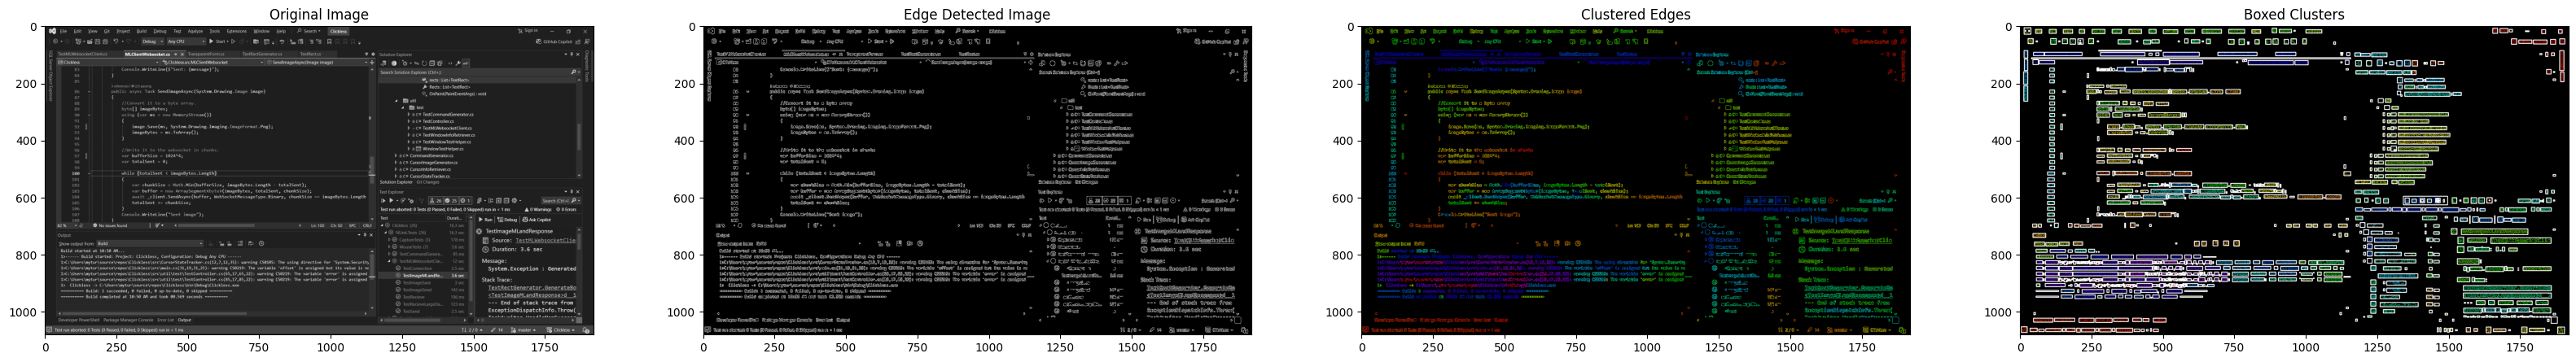

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import hdbscan

image = cv2.imread('visual_studio.png', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found or unable to open")
else:
    # GaussianBlur to reduce image noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred_image, 100, 200)

    # Find coordinates of edge points
    y, x = np.where(edges > 0)
    edge_points = np.column_stack((x, y))

    # Apply DBSCAN clustering based on distance
    # db = DBSCAN(eps=5, min_samples=5).fit(edge_points)
    
    # clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3, metric='euclidean')
    # clusterer.fit(edge_points)
    # labels = clusterer.labels_

    # Get the number of clusters
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # Create an image to display the clusters
    clustered_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

    # Assign different colors to different clusters
    colors = plt.get_cmap('hsv', n_clusters + 1)
    for label in set(labels):
        if label == -1:
            # Noise points are black
            color = (0, 0, 0)
        else:
            color = colors(label / n_clusters)[:3]
            color = tuple([int(255 * c) for c in color])
        clustered_image[y[labels == label], x[labels == label]] = color

    # Create an image to display the bounding boxes
    boxed_image = clustered_image.copy()

    bboxes = []
    for label in set(labels):
        if label == -1:
            continue
        # Get the coordinates of the points in the cluster
        cluster_points = edge_points[labels == label]
        # Compute the bounding box
        x_min, y_min = np.min(cluster_points, axis=0)
        x_max, y_max = np.max(cluster_points, axis=0)
        bboxes.append([x_min, y_min,x_max, y_max])
        # Draw the bounding box
        cv2.rectangle(boxed_image, (x_min, y_min), (x_max, y_max), (255, 255, 255), 2)

    # Display the original image, edge detected image, clustered edges, and boxed clusters
    plt.figure(figsize=(40, 20))

    plt.subplot(1, 4, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')

    plt.subplot(1, 4, 2)
    plt.title('Edge Detected Image')
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 4, 3)
    plt.title('Clustered Edges')
    plt.imshow(clustered_image)

    plt.subplot(1, 4, 4)
    plt.title('Boxed Clusters')
    plt.imshow(boxed_image)

    plt.show()


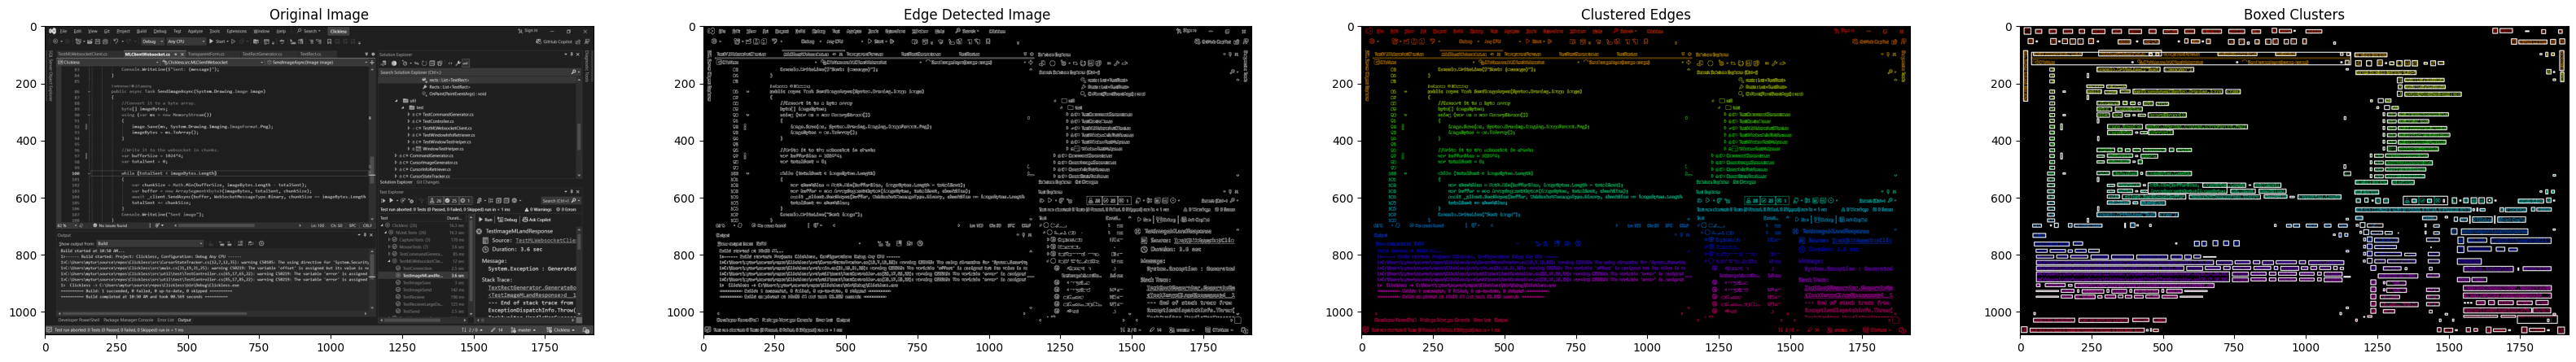

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import hdbscan

image = cv2.imread('visual_studio.png', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found or unable to open")
else:
    # GaussianBlur to reduce image noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred_image, 100, 200)

    # Find coordinates of edge points
    y, x = np.where(edges > 0)
    edge_points = np.column_stack((x, y))

    # Apply DBSCAN clustering based on distance
    db = DBSCAN(eps=5, min_samples=3).fit(edge_points)
    
    # clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5, metric='euclidean')
    # clusterer.fit(edge_points)
    labels = db.labels_

    # Get the number of clusters
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # Create an image to display the clusters
    clustered_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

    # Assign different colors to different clusters
    colors = plt.get_cmap('hsv', n_clusters + 1)
    for label in set(labels):
        if label == -1:
            # Noise points are black
            color = (0, 0, 0)
        else:
            color = colors(label / n_clusters)[:3]
            color = tuple([int(255 * c) for c in color])
        clustered_image[y[labels == label], x[labels == label]] = color

    # Create an image to display the bounding boxes
    boxed_image = clustered_image.copy()

    bboxes = []
    for label in set(labels):
        if label == -1:
            continue
        # Get the coordinates of the points in the cluster
        cluster_points = edge_points[labels == label]
        # Compute the bounding box
        x_min, y_min = np.min(cluster_points, axis=0)
        x_max, y_max = np.max(cluster_points, axis=0)
        bboxes.append([x_min, y_min,x_max, y_max])
        # Draw the bounding box
        cv2.rectangle(boxed_image, (x_min, y_min), (x_max, y_max), (255, 255, 255), 2)

    # Display the original image, edge detected image, clustered edges, and boxed clusters
    plt.figure(figsize=(40, 20))

    plt.subplot(1, 4, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')

    plt.subplot(1, 4, 2)
    plt.title('Edge Detected Image')
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 4, 3)
    plt.title('Clustered Edges')
    plt.imshow(clustered_image)

    plt.subplot(1, 4, 4)
    plt.title('Boxed Clusters')
    plt.imshow(boxed_image)

    plt.show()
